<a href="https://colab.research.google.com/github/SherylA/Fundamentos/blob/master/IV_Unidad_Principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de archivos por python

Más info:

* [Mod os](https://docs.python.org/3.6/library/os.html) 

* [Mod shutil](https://docs.python.org/3.6/library/shutil.html?highlight=shutil#module-shutil)

La librería por defecto para el manejo de los archivos es **os** (Operative System) y la librería de ultilidades **shutil**, por ejemplo para recorrer un directorio y su contenido podemos usar:

In [0]:
import os
import shutil
for root, dirs, files in os.walk("./"):
  print("Ruta actual:", root)
  print("Carpetas:", ", ".join(dirs))
  print("Archivos:", ", ".join(files),end='\n\n')


Ruta actual: ./
Carpetas: .config, sample_data
Archivos: 

Ruta actual: ./.config
Carpetas: configurations, logs
Archivos: .last_update_check.json, active_config, .last_survey_prompt.yaml, config_sentinel, gce, .metricsUUID

Ruta actual: ./.config/configurations
Carpetas: 
Archivos: config_default

Ruta actual: ./.config/logs
Carpetas: 2019.12.18
Archivos: 

Ruta actual: ./.config/logs/2019.12.18
Carpetas: 
Archivos: 16.52.31.147337.log, 16.52.34.414154.log, 16.52.05.166856.log, 16.52.35.435000.log, 16.52.20.616768.log

Ruta actual: ./sample_data
Carpetas: 
Archivos: README.md, anscombe.json, mnist_train_small.csv, california_housing_test.csv, mnist_test.csv, california_housing_train.csv



Recordemos que estamos trabajando en remoto, es posible que ciertas cosas que guardemos en el entorno de google se borren con el tiempo. Para manejo de ficheros y archivos tenemos: 


In [0]:
#pwd
print(os.getcwd())
#ls
print(os.listdir())
#mkdir
#os.mkdir("datos/")
print(os.listdir())


/content
['.config', 'sample_data']
['.config', 'sample_data']


Para borrar, copiar y mover archivos tenemos las funciones: 

* Para directorios

```python
os.rmdir('dir') # directorio vacío
shutil.rmtree('dir') #directorio lleno 
shutil.copytree('dir','dir_cp') 
```
* Para archivos

```python
os.remove('name') 
shutil.copy('name','name_cp') 
```

* Para Cualquiera

```python
shutil.move('old_file','new_file' )
os.rename('old_name','new_name')
```

## Otras operaciones

También hay otras operaciones, sobre todo de validación de información, por ejemplo

In [0]:
print(os.listdir())
#Vamos a comentar/descomentar estas líneas para trabajar con archivos
#os.remove('Clase12.pdf')
#print(os.listdir())
#os.rename('aja.zip','comprimdo.zip')
#print(os.listdir())


['.config', 'sample_data']


In [0]:
#Verificar existencia de rutas
print(os.path.exists("datos2"))

#Verificar si es un archivo o un directorio
print(os.path.isfile("datos2"))
print(os.path.isdir("datos2"))


False
False
False


## Archivos de entrada y salida

Existen dos formas básicas de acceder a un archivo de datos según
su formato, una es el archivo de texto, que procesaremos línea por
línea; la otra es un archivo binario, que procesaremos byte por byte.

Para abrir un archivo usamos **open**

In [0]:
archivo = open('sample_data/README.md') # Es por defecto de solo lectura

Esta función intentará abrir el archivo con el nombre indicado. Si tiene éxito, devolverá una variable que nos permitirá manipular el archivo de diversas maneras.

In [0]:
linea = archivo.readline()

#for linea in archivo:
while linea != '':
  # procesar línea
  linea = archivo.readline()
  print(linea)

#Esta no es la mejor opción puesto que carga en memoria todo el documento
#lineas = archivo.readlines()
archivo.close()



*   `california_housing_data*.csv` is California housing data from the 1990 US

    Census; more information is available at:

    https://developers.google.com/machine-learning/crash-course/california-housing-data-description



*   `mnist_*.csv` is a small sample of the

    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is

    described at: http://yann.lecun.com/exdb/mnist/



*   `anscombe.json` contains a copy of

    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it

    was originally described in



    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American

    Statistician. 27 (1): 17-21. JSTOR 2682899.



    and our copy was prepared by the

    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).




**Modos de apertura de un archivo**

* Modo de sólo lectura (r). En este caso no es posible realizar
modificaciones sobre el archivo, solamente leer su contenido.

* Modo de sólo escritura (w). En este caso el archivo es truncado
(vaciado) si existe, y se lo crea si no existe.

* Modo sólo escritura posicionándose al final del archivo (a). En
este caso se crea el archivo, si no existe, pero en caso de que
exista se posiciona al final, manteniendo el contenido original.

* Por otro lado, en cualquiera de estos modos se puede agregar un + para pasar a un modo lectura-escritura. El comportamiento de
r+ y de w+ no es el mismo, ya que en el primer caso se tiene el
archivo completo, y en el segundo caso se trunca el archivo,
perdiendo así los datos.

In [0]:
saludo = open("saludo.txt", "w")

saludo.write("""Hola ------------------->
Mundo\n""")

cadena1="Hola"
cadena2="Mundo"

saludo.writelines((cadena1,cadena2))
saludo.close()


In [0]:
#Vamos a revisar los files
os.listdir()

['.config', 'saludo.txt', 'sample_data']

In [0]:
revisar = open('saludo.txt')
print(revisar.readlines())
revisar.close()

['Hola ------------------->\n', 'Mundo\n', 'HolaMundo']


* No todos los archivos son archivos de texto, y por lo tanto no todos los archivos pueden ser procesados por líneas. Existen archivos en los que cada byte tiene un significado particular, y es necesario manipularlos conociendo el formato en que están los
datos para poder procesar esa información.

* Para abrir un archivo y manejarlo de forma binaria es necesario agregarle una b al parámetro de modo de apertura ```archivo = open('bin','rb') ```

* Para procesar el archivo
de a bytes en lugar de líneas, se utiliza la función ```contenido = archivo.read(n) ```

*  Tal que la función permite leer n bytes y para escribir contenido en la posición actual del archivo ```archivo.write(contenido)```





## Ejercicios

1. Hacer un archivo de texto con los números de 1 hasta n
2. Leer el archivo línea por línea y determinar cuantos pares e
impares hay en el fichero.

In [0]:
N = 100
archivo = open('contar','w')
for i in range(1,N+1):
  archivo.write(str(i)+'\n')
archivo.close()

archivo = open('contar')
num = [int(line.strip('\n')) for line in archivo]
num_par = [num_i for num_i in num if num_i%2==0]
num_impar = [num_i for num_i in num if num_i%2!=0]

print('Hay %d pares y %d impares'%(len(num_par),len(num_impar)))



Hay 50 pares y 50 impares


3. Hacer un archivo de texto con los pares entre $[1,100]$
4. Leer el archivo anterior y hallar los dobles de eso números.  

In [0]:
archivo = open('pares.dat','w')
pares = [str(i)+'-' for i in range(1,101) if i%2==0]
archivo.writelines(pares)
archivo.close()
archivo = open('pares.dat')

def doble(x):
  return 2*int(x)

#list_info = archivo.readlines()[0].split('-')[:-1]
#info = [doble(l) for l in lista]
info = list(map(doble,archivo.readlines()[0].split('-')[:-1]))
print(info)


[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200]


## Archivos en google colab

Para subir y descargar archivos desde nuestro espacio virtual/local podemos usar:
```python
from google.colab import files
#Upload
my_file = files.upload()
#Download
files.download('name')
```
**Importante**

Recomiendo el camino anterior para el manejo de nuestros archivos que guardar archivos en google drive, dado a que hay que facilitar permisos entre la cuenta y google cloud, aunque es relativamente seguro, el nivel de acceso a su cuenta por parte de la aplicación es alto.

Descargar
```python
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'xxxxxxxxxxxxxxxxxxxxxxxx'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
```

Guardar
```python
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))
```

## Consola en google colab

Se pueden usar comando de consola en las celdas de texto de google colab

```
! ls *.jpg
! zip aja.zip *.jpg
```



# NUMPY 

Numpy es un paquete fundamental para el trabajo científico en python:
* Contiene Funciones, módulos, clases y cierto tipo especial de datos. 
* Permite el manejo de Arrays Multidimensionales. 
* Contiene Funciones sofisticadas y optimizadas. Permite incorporar códigos en C/C++ o fortran. 
* Contiene un paquete de álgebra lineal y permite hacer cálculos estadísticos, ajustes, interpolación entre otras.


> El tipo de dato mas importante en numpy es el **array**. El array es un tipo de dato, formado a partir de otro tipo de datos mas sencillos y que estan ordenados en una secuencia definida, en ese sentido es muy similar a una lista o tupla, pero a diferencia de estos, un array solo admite un tipo de dato.

### Crear un array

Un array puede ser creado:

* Mediante el uso de datos nativos de python (listas, tuplas,datos
básicos)

* Con funciones de numpy

* Leyendo un fichero de datos

* Con otro array (haciendo copia)

In [0]:
import numpy as np

lista = [1,2.0,5,3+3j]
#lista = [[1,2.0,5,3],[0,5,9,6]]
#lista = [[[1,2.0,5,3],[0,5,9,6]],[[1,2.0,5,3],[0,5,9,6]],[[1,2.0,5,3],[0,5,9,6]]]
array = np.array(lista,dtype=str)

print("El arreglo es: ",array)
print("Las dimensiones del arreglo son: ",array.shape)
# cs,s,c,r --> recordar (conjunto,corte,columna,fila)
print("El número de dimensiones del arreglo es", array.ndim)
print("El número de elementos del arreglo es", array.size)
print("El tamaño de un elemento del arreglo es", array.itemsize,'bytes')
print("El tamaño total de elementos del arreglo es", array.nbytes,'bytes')
print("El tipo de elementos del arreglo es", array.dtype)
print("Parte real del arreglo es", array.real)
print("Parte imaginaria del arreglo es", array.imag)


El arreglo es:  ['1' '2.0' '5' '(3+3j)']
Las dimensiones del arreglo son:  (4,)
El número de dimensiones del arreglo es 1
El número de elementos del arreglo es 4
El tamaño de un elemento del arreglo es 24 bytes
El tamaño total de elementos del arreglo es 96 bytes
El tipo de elementos del arreglo es <U6
Parte real del arreglo es ['1' '2.0' '5' '(3+3j)']
Parte imaginaria del arreglo es ['' '' '' '']


### Funciones de numpy para crear arreglos

* arange([start],[stop],[step],dtype=None)
* linspace(start,stop,num=50,endpoint=True,retstep=False)

* ones(shape,dtype=None)
* zeros(shape, dtype=float)


In [0]:
arreglo1 = np.arange(1,2,0.1)
#print(arreglo1)
#Sin regresar el paso
#arreglo2= np.linspace(0,10,10,endpoint=True,retstep=False)
#Regresando el paso
arreglo2,step = np.linspace(0,10,10,endpoint=True,retstep=True)
#print(step)
arreglo3 = np.ones((1,3))
#print(arreglo3)
arreglo4 = np.zeros((2,3,6,5))
#print(arreglo4)

### Operaciones en Numpy

A diferencias de las listas en Numpy se pueden hacer operaciones punto a punto lo cual facilita en gran medida la simplicidad a la hora de escribir y hacer ejecicios

[Mas info de numpy](https://numpy.org/doc/)

In [0]:
import numpy as np

#Movimiento acelerado y = v0*t - 0.5*g*t**2 + y0

y0 = 5 #[m]
v0 = 15 #[m/s]
g  = 9.8 #[m/s^2]

t = np.linspace(0,2,100) #[s]
y = y0 + v0*t -0.5*g*t**2

# Función parámetrica del círculo
theta = np.linspace(0,np.pi*2,360)
R = 5
x = R*np.cos(theta)
y = R*np.sin(theta)

# Función lógica
x = np.linspace(-1,1,20)
#seleccionar los positivos
x_pos = x[x>0]
y = np.sqrt(x_pos)

# Operación entre matrices

#Arreglos operan componente a componente
A = np.array([[1,2,4],[2,5,9]])
print("Como arreglo: \n",A*A)
print('Una impresión más bonita:')
print(np.array2string(A*A).replace('[',' ').replace(']',' '))

#Matrices operan (mul) de forma apilada
A = np.matrix([[1,2,4],[2,5,9]])
print('Como matriz: \n',A*A.T)

print('Una impresión más bonita:')

print(np.array2string(A*A.T).replace('[',' ').replace(']',' '))


Como arreglo: 
 [[ 1  4 16]
 [ 4 25 81]]
Una impresión más bonita:
   1  4 16 
   4 25 81  
Como matriz: 
 [[ 21  48]
 [ 48 110]]
Una impresión más bonita:
   21  48 
   48 110  


### Funciones de Numpy para los archivos I/O

La función para leer texto es:

```python
loadtxt(fname, dtype=numpy.float,
 comments="#", delimiter=None, 
 converts=None, skiprows=0, 
 usecols=None, unpack=False, ndim=0)
```

La función para guardar texto es:

```python
savetxt(fname, X, fmt='%.18e', 
delimiter='', newline='\n',
header='', footer='', comments='#')
```


In [0]:
import numpy as np

#Valores dependientes

c1 = np.linspace(0,1,100)
c2 = c1**2
c3 = 2*c1
c4 = np.sin(c2)
c5 = np.cos(c3)

table = np.array([c1,c2,c3,c4,c5])

np.savetxt('datos.dat',table.T,fmt='%.6e',header='c1 \t c2 \t c3 \t c4 \t c5',footer='By: Sheryl Avendaño')

p1,p2,p3,p4,p5 = np.loadtxt('datos.dat',unpack=True)

print('¿p1 = c1?', p1[1]==c1[1],p1[1],c1[1])

¿p1 = c1? False 0.01010101 0.010101010101010102


## Ejercicios

1. Una partícula en un sistema coordenado 3d tiene un vector posición $(x,y,z)$ con una velocidad constante $(v_{x0},v_{y0},v_{z0})$. Calcular el vector posición en los tiempo entre $[0,2]$[s] partiendo de $(0,0,0)$. Guardar esa información en un archivo.

2. Cargar el archivo anterior, como las variables x,y,z,t y hallar la norma del vector posición.  

In [0]:
import numpy as np

v0 = np.array((2,3,6)) #[m/s]
x0 = np.array((0,0,0)) #[m]
t = np.linspace(0,2,100) #[s]

# Opción simple
x = x0[0] + v0[0]*t
y = x0[1] + v0[1]*t
z = x0[2] + v0[2]*t
table = np.array([x,y,z,t])

#save
np.savetxt('datos.data',table.T)
#load
norma = np.sqrt(x**2 + y**2 + z**2)

#Opción compleja
#Hacemos que v sea (3 colum x 1 fila)
v0 = v0.reshape((1,3))
#Y hacemos que t sea (1 columna x 100 filas)
t = t.reshape((100,1))
# operamos v0*t + x ---> (3x1)(1x100) = (3x100) + (3,) --> x0 se sumará a cada fila  
X = x0 + v0*t # (3x100)
print(all(x == X[:,0]))
# x,y,z = X[:,0], X[:,1],X[:,2] --> recordemos que la primera es la fila, la segunda es la columna 
table2 = np.append(X,t,axis=1)
print(table.shape,table2.shape)

True
(4, 100) (100, 4)


## Funciones de Numpy 

En el módulo de numpy hay una gran cantidad de funciones no sólo de álgebra lineal también de medidas estadísticas y otras. Vamos a ver algunas generales:

[Lineal](https://numpy.org/devdocs/reference/routines.linalg.html)

[Random](https://numpy.org/devdocs/reference/random/index.html)

[Statistics](https://numpy.org/devdocs/reference/routines.statistics.html)

In [0]:
import numpy as np

#Funciones random 
A = np.array(['a','b','c','d','e','f'])
print('Un arreglo de letras:',A)
print("Escoger un valor en el arreglo anterior:",np.random.choice(A))
print("Elegir un número entero entre a=0 y b=100",np.random.randint(0,100))
print("Elegir N=5 números entre 0 y 1 (dist uniforme)",np.random.rand(5))
print("Elegir N=5 números entre a=1 y b=2 (dist uniforme)",np.random.uniform(1,2,5))
print("Elegir N=7 números para media=3, desv=9 (dist normal)",np.random.normal(3,9,7))

print('\n')

#Funciones álgebra lineal
A = np.matrix([[1,2],[9,6]])
x = np.matrix([1,6])
b = A*x.T
print('A*x = b \n',b)
print('La solución es \n',np.linalg.solve(A,b))
print('La norma de x:',np.linalg.norm(x))
print('\n')
#Funciones de estadísitca
arreglo = np.random.uniform(0,10,20)
print('Promedio:',arreglo.mean())
print('Desviación:',arreglo.std())
print('Mediana:',np.median(arreglo))

print('\n')
#Otras
arreglo2 = arreglo.copy()
print("Organizar un arreglo:",arreglo2.argsort())
print("Hallar el mínimo:",arreglo2.min())
print("Halalr el máximo:",arreglo2.max())
print("Hallar el índice del mínimo:",arreglo2.argmin())
print("Hallar el índice del máximo:",arreglo2.argmax())



Un arreglo de letras: ['a' 'b' 'c' 'd' 'e' 'f']
Escoger un valor en el arreglo anterior: e
Elegir un número entero entre a=0 y b=100 97
Elegir N=5 números entre 0 y 1 (dist uniforme) [0.4460529  0.49294848 0.60344589 0.99080791 0.92421264]
Elegir N=5 números entre a=1 y b=2 (dist uniforme) [1.45727109 1.46720776 1.17649626 1.33785918 1.78255266]
Elegir N=7 números para media=3, desv=9 (dist normal) [ 1.84861836 -0.95298638 -2.82361856  4.84988359  2.9940231   2.25556435
  6.12211007]


A*x = b 
 [[13]
 [45]]
La solución es 
 [[1.]
 [6.]]
La norma de x: 6.082762530298219


Promedio: 5.338272550111828
Desviación: 3.032111450649651
Mediana: 5.395482323210651


Organizar un arreglo: [17  4  9  7 11 14  1 13 12  5 16 19 18 10  6  8  3  2 15  0]
Hallar el mínimo: 0.7377278049573854
Halalr el máximo: 9.815801015125722
Hallar el índice del mínimo: 17
Hallar el índice del máximo: 0


# Matplolib

¿Qué es Matplotlib?

* Paquete fundamental para el trabajo científico en python.

* Contiene Funciones y módulos para graficar y vizualizar datos de
forma rápida y sencilla.

* Permite la generación de gráficos a partir de datos contenidos en
listas o arrays.
* Se usa en extensión de NumPy, además proporciona una API,
pylab, diseñada para recordar a la de MATLAB.

¿Cómo lo usamos?

* Por consola: pylab
* En scripts: pyplot
* En jupyter-notebok: pyplot

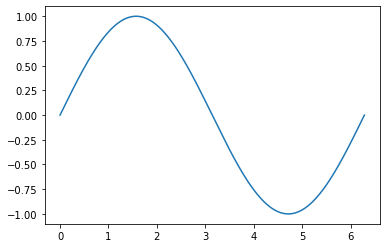

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Vamos a graficar la función f(x) = sin x
x = np.linspace(0,2*np.pi,360)
fx = np.sin(x)

#Primero llamamos a la figura
plt.figure('Name')
plt.plot(x,fx)
plt.show()

## Objetos importantes en pyplot

Así cómo Numpy tiene los **array** cómo objetos importantes, pyplot cuenta con dos que vamos a destacar **Figure** y **Axes**

[Ver más](https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

![texto alternativo](https://matplotlib.org/3.1.1/_images/anatomy.png)

```python
matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, 
facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 
'matplotlib.figure.Figure'>, clear=False, **kwargs)

class matplotlib.figure.Figure(figsize=None, dpi=None, facecolor=None,
 edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, 
 tight_layout=None, constrained_layout=None)[source]
```

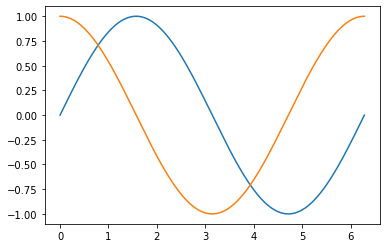

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,360)
fx = np.sin(x)
gx = np.cos(x)

#En la misma figura
fig1 = plt.figure('Name')
plt.plot(x,fx)
plt.plot(x,gx)
plt.show()

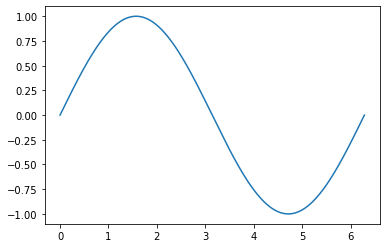

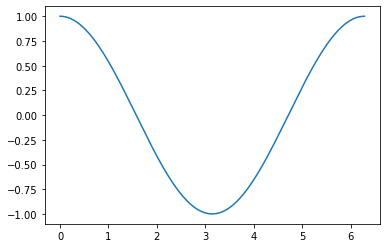

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,360)
fx = np.sin(x)
gx = np.cos(x)

#En figuras diferentes 
fig1 = plt.figure('Name1')
plt.plot(x,fx)

fig2 = plt.figure('Name2')
plt.plot(x,gx)

plt.show()

Figure es una clase con varios métodos importantes más información en [source](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure). Uno de ellos en agregar un conjunto de ejes y con ello se puede cambiar la proyección por ejemplo: 

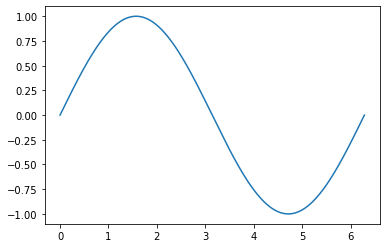

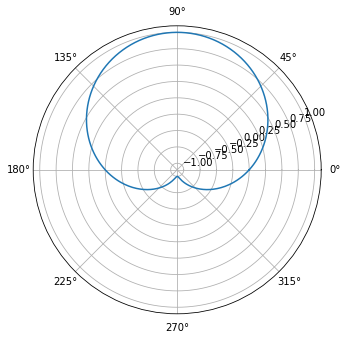

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,360)
fx = np.sin(x)

rect = 4, 5, 2, 1
fig1 = plt.figure('Cartesianas')
plt.plot(x,fx,figure=fig1)

fig2 = plt.figure('Polares')
fig2.add_axes(rect,polar=True,label='aja')
plt.plot(x,fx,figure=fig2)
plt.show()

La clase Axes suele usada cuand se quieran hacer cosas especiales, mientras Figure hace referencia a la plantilla principal, Axes lo hace sobre cambios en los ejes. Por ejemplo pensemos en la gráfica anterior, ambas son la misma función pero en sistemas coordenados distintos, si yo quisera las dos gráficas en una figura podría usar la función **subplot** que me devuelve un Axes:

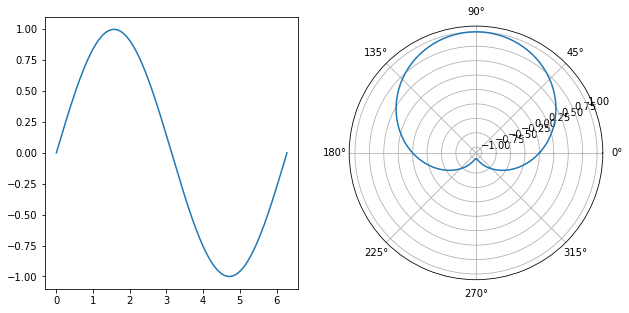

In [0]:
x = np.linspace(0,2*np.pi,360)
fx = np.sin(x)

fig1 = plt.figure('Seno en cartesians y polares',figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(x,fx)
ax2 = plt.subplot(1,2,2,projection='polar')
ax2.plot(x,fx)
plt.show()

En el caso anterior, generalmente se usa:
```python
plt.figure('Seno en cartesians y polares',figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,fx)
plt.subplot(1,2,2,projection='polar')
plt.plot(x,fx)
plt.show()
```
En este caso los la función hace lo mismo pero no se relaciona ninguna variable con cada eje, dado a que la clase tiene más métodos especiales para hacer más cosas en estos casos, retornar puede ser muy útil. Por ejemplo si quiero en una misma figura las funciones de seno y coseno pero que compartar el eje y podría usar **subplots**: 

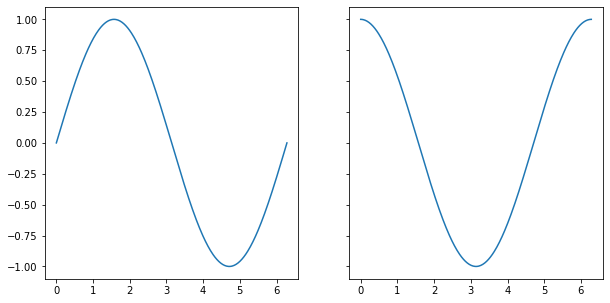

In [0]:
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True,figsize=(10,5))
ax1.plot(x,fx)
ax2.plot(x,gx)
plt.show()

Sobre este tema hay muchas cosas que se pueden hacer. Lamentablemente el módulo es tan grande y las opciones tan variadas que hay muchos ejemplos para obtener los mismos resultados. Una buen guía para matplotlib son los [Tutoriales](https://matplotlib.org/3.1.1/tutorials/index.html) que hay en su documentación.


Sobre las coordenadas polares hay varias funciones que no son bien gráficadas, principalmente por indetermianciones en ellas. 



(-10, 10)

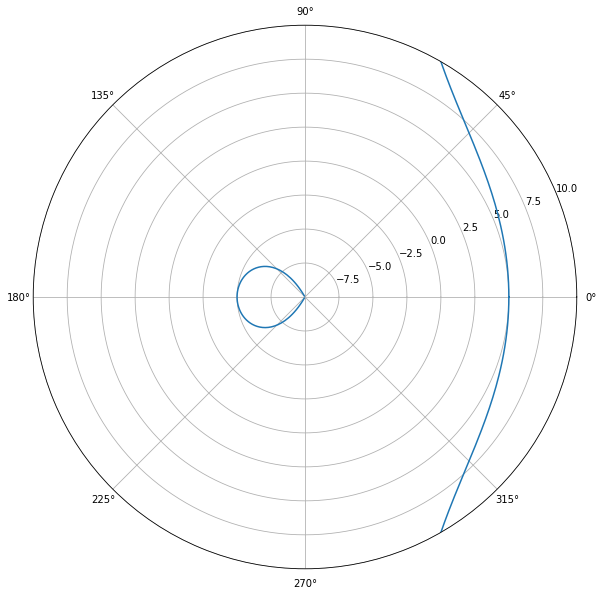

In [0]:
fig=plt.figure(figsize=(10,10))
t = np.linspace(0,2*np.pi,360) 
x = 5/np.cos(t)
plt.polar(t,x)
plt.ylim(-10,10)

 

## Plantillas de trabajo con Matplotlib 2D

Aquí hay algunos ejemplos sencillos para hacer ciertas figuras:


In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Vamos hacer varias gráficas en una sóla ventana
#Y=MX+B
#Y=AX^2+BX+C 
#(X-A)^2+(Y-B)^2=R^2
#((X-X1)/A)^2+((Y-Y1)/B)^2=1

#la sentencia isinstance(a,tipo) es para comprobar si a es de tal tipo, sino hay un problema de ejecución

def check_array(x):
	return isinstance(x,np.ndarray)

def check_list(x):
	return isinstance(x,list)

def check_number(x):
	return (isinstance(x,float) or isinstance(x,int))

def line(x,m,b):
	if (check_array(x) and check_number(m) and check_number(b)):
		return m*x+b
	else:
		print("Error data!")

def parable(x,a,b,c):
	if (check_array(x) and check_number(a) and check_number(b) and check_number(c)):
		return a*x**2.0+b*x+c
	else:
		print("Error data!")

def circle(theta,R,A,B):
	if (check_array(theta) and check_number(R) and check_number(A) and check_number(B)):		
		x=np.cos(theta)*R+A
		y=np.sin(theta)*R+B
		return x,y
	else:
		print("Error data!")

def elipse(theta,X1,Y1,A,B):
	if (check_array(theta) and check_number(A) and check_number(B) and check_number(Y1) and check_number(X1)):		
		x=A*np.cos(theta)+X1
		y=B*np.sin(theta)+Y1
		return x,y
	else:
		print("Error data!")


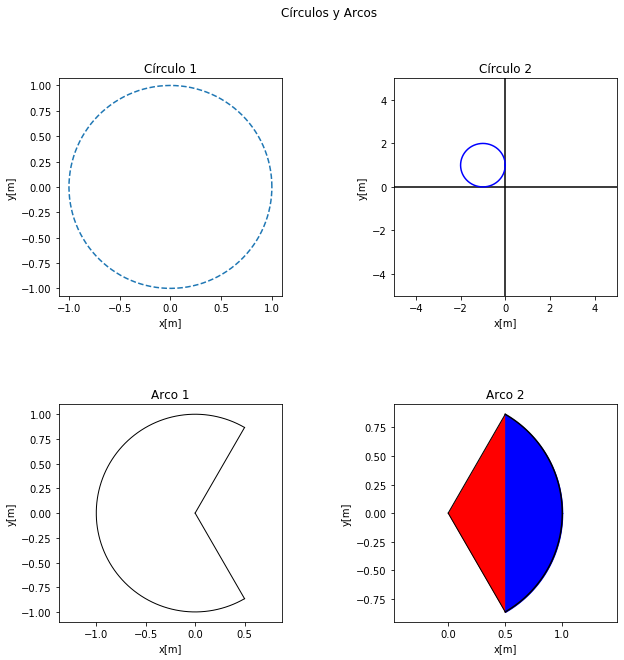

In [0]:
plt.figure('Fig1',figsize=(10,10))

plt.suptitle('Círculos y Arcos')  # Ponemos un título
#Podemos usar subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#Para ajustar los espacios de las figuras pequeñas
plt.subplots_adjust(wspace = 0.5,hspace=0.5)

##Vamos hacer 4 gráficas en una sóla figura

################################################################################
plt.subplot(2,2,1) 

#Para un mismo theta
theta=np.linspace(0,2*np.pi,360)
x=np.zeros(100)
y=np.zeros(100)
#Círculo en el centro
x,y=circle(theta,1,0,0)
plt.title(u'Círculo 1') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Por la forma de los ejes puede que no lo veamos como un círculo, agregamos que
#los ejes sean equitativos visualmente
plt.axis('equal')
plt.plot(x,y,linestyle="--") 

################################################################################
plt.subplot(2,2,2) 
plt.title(u'Círculo 2') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Círculo no centrado
x,y=circle(theta,1,-1,1)

#Vamos a asingar los límites de nuestro ejes
plt.xlim(-5, 5)
plt.ylim(-5, 5)

#Vamos hacer dos líneas negras en los ejes x=0 y=0
plt.axhline(y=0, color="black",xmin=0, xmax=10)
plt.axvline(x=0, color="black",ymin=0, ymax=10)
plt.plot(x,y, color="blue") 

################################################################################
plt.subplot(2,2,3) 

#Para un arco
theta=np.linspace((1.0/3.0)*np.pi,(5.0/3.0)*np.pi,100)
x=np.zeros(100)
y=np.zeros(100)
#Arco en el centro
x,y=circle(theta,1,0,0)

plt.title('Arco 1') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('equal')

#Aquí vemos un packman jajajaj 
plt.plot(x,y,color="black",linewidth=1) 
xline=np.linspace(0,1,100)*np.cos((1.0/3.0)*np.pi)
yline1=np.linspace(0,1,100)*np.sin((1.0/3.0)*np.pi)
yline2=np.linspace(0,1,100)*np.sin((5.0/3.0)*np.pi)
plt.plot(xline,yline1,color="black",linewidth=1) 
plt.plot(xline,yline2,color="black",linewidth=1) 

################################################################################
plt.subplot(2,2,4) 

plt.title('Arco 2') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Para un arco
theta=np.linspace((-1.0/3.0)*np.pi,(1.0/3.0)*np.pi,100)
x=np.zeros(100)
y=np.zeros(100)
#Arco en el centro
x,y=circle(theta,1,0,0)

#Aquí vemos el arco coloreado 
plt.plot(x,y,color="black") 
plt.plot(xline,yline1,color="black",linewidth=1) 
plt.plot(xline,yline2,color="black",linewidth=1) 
#Ahora vamos a colorear usando fill_between
#El primer argumento es el intervalo de x primero coloreamos entre las líneas rectas
plt.fill_between(xline, yline1,yline2,color="red")
#Luego coloreamos para el arco
plt.fill_between(x, 0,y,color="blue")
#Podemos colocarlo en el mismo tipo de color para que no se note la diferencia
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('equal')
plt.show()

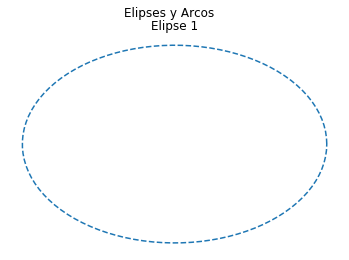

In [0]:
#Para un mismo theta
theta=np.linspace(0,2*np.pi,100)
x=np.zeros(100)
y=np.zeros(100)
#Elipse en el centro
x,y=elipse(theta,0,0,1,2)

plt.figure('Fig2')
plt.suptitle(u'Elipses y Arcos')  # Ponemos un título
plt.title(u'Elipse 1') #Ponemos un subtítulo
#Vamos a quitar los ejes
plt.axis('off')
#Si queremos sólo quitamos los ticks(los números y el label para dejar el cuadro)
#plt.xticks([]) # labels 
#plt.yticks([])

plt.plot(x,y,linestyle="--") 
plt.show()

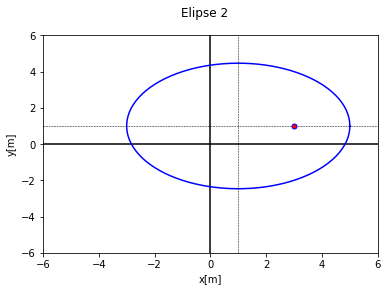

In [0]:
plt.figure('Fig2')
plt.suptitle(u'Elipse 2')  # Ponemos un título
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#elipse no centrado
#Si recordamos el foco es igual a f=raiz(A^2-B^2) siendo A el semieje mayor
#Y la excentridad es igual a e=f/A, siendo A el semieje mayor.
#Si tenemos las ecuaciones del foco y la exentricidad podemos calcular la componente B
f=2
e=0.5
A=f/e
B=np.sqrt(A**2-f**2)
x,y=elipse(theta,1,1,A,B)

#Vamos a asingar los límites de nuestro ejes
plt.xlim(-6, 6)
plt.ylim(-6, 6)
#Vamos hacer dos líneas negras en los ejes x=0 y=0
plt.axhline(y=0, color="black",xmin=0, xmax=10)
plt.axvline(x=0, color="black",ymin=0, ymax=10)
plt.plot(x,y, color="blue") 
#Agreguemos una línea punteada para ubicar el foco 
plt.axhline(y=1, color="black",xmin=0, xmax=10,linestyle="--",linewidth=0.5)
plt.axvline(x=1, color="black",ymin=0, ymax=10,linestyle="--",linewidth=0.5)
plt.plot(f+1,1, linestyle="",marker="o",markersize=5,markeredgecolor="blue",markerfacecolor="red") 
plt.show()

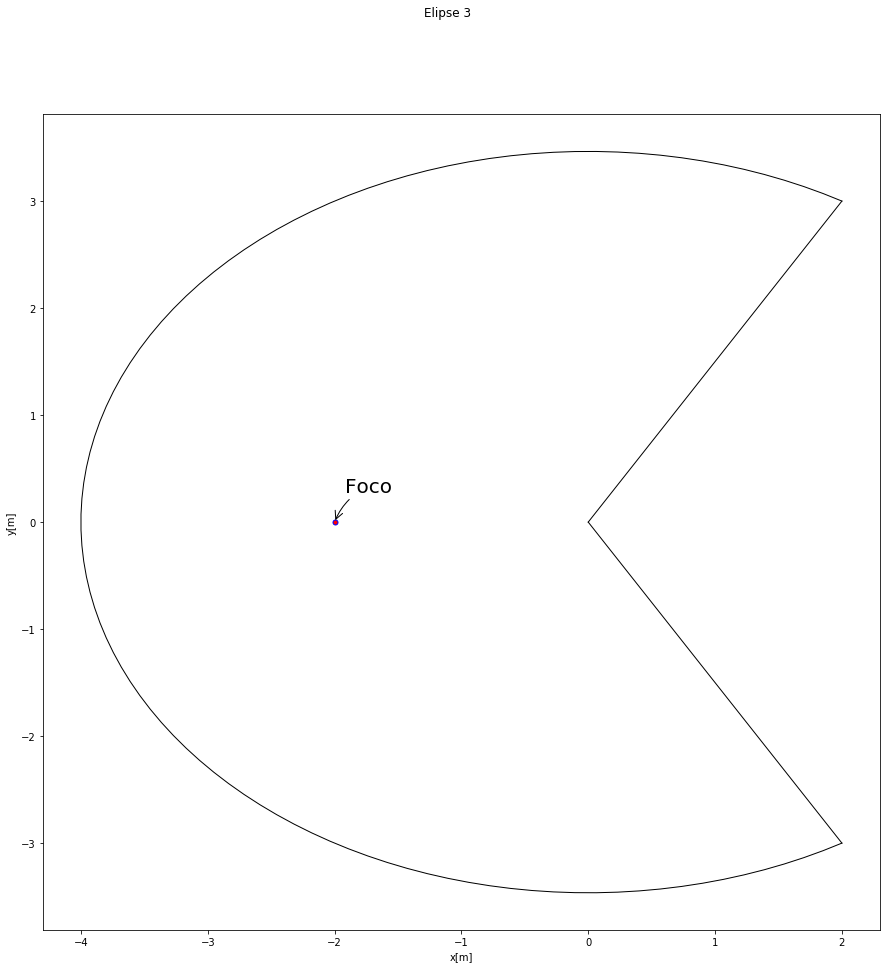

In [0]:
import math as m
plt.figure('Fig3',figsize=(15,15))
plt.suptitle(u'Elipse 3')  # Ponemos un título
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Para un arco
theta=np.linspace((1.0/3.0)*np.pi,(5.0/3.0)*np.pi,100)
x=np.zeros(100)
y=np.zeros(100)
#Arco en el centro
x,y=elipse(theta,0,0,A,B)



#Aquí vamos a poner un texto para el foco
plt.plot(x,y,color="black",linewidth=1) 
xline=A*np.linspace(0,1,100)*m.cos((1.0/3.0)*m.pi)
yline1=B*np.linspace(0,1,100)*m.sin((1.0/3.0)*m.pi)
yline2=B*np.linspace(0,1,100)*m.sin((5.0/3.0)*m.pi)
plt.plot(xline,yline1,color="black",linewidth=1) 
plt.plot(xline,yline2,color="black",linewidth=1) 
plt.plot(-f,0, linestyle="",marker="o",markersize=5,markeredgecolor="blue",markerfacecolor="red") 
plt.annotate('Foco',
            xy=(-f,0), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=20,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()


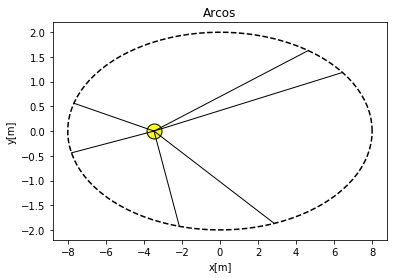

In [0]:
plt.figure()
plt.title('Arcos') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Una elipse completa
theta=np.linspace(0,2*m.pi,100)
x=np.zeros(100)
y=np.zeros(100)
x,y=elipse(theta,0,0,8,2)
#El foco estaría en (A^2-B^2)^0.5=12
f=12**0.5
#Aquí vemos la elipse con algunos arcos 
plt.plot(x,y,color="black",linestyle="--") 
plt.plot(-f,0, linestyle="",marker="o",markersize=15,markeredgecolor="black",markerfacecolor="yellow") 

#Los arcos van desde el foco hasta ciertos puntos de la elipse
plt.plot([-f,x[10]],[0,y[10]],color="black",linewidth=1) 
plt.plot([-f,x[15]],[0,y[15]],color="black",linewidth=1)

#Hacemos otro arco
plt.plot([-f,x[45]],[0,y[45]],color="black",linewidth=1) 
plt.plot([-f,x[53]],[0,y[53]],color="black",linewidth=1)

#Y otro más
plt.plot([-f,x[70]],[0,y[70]],color="black",linewidth=1) 
plt.plot([-f,x[80]],[0,y[80]],color="black",linewidth=1)



plt.show()

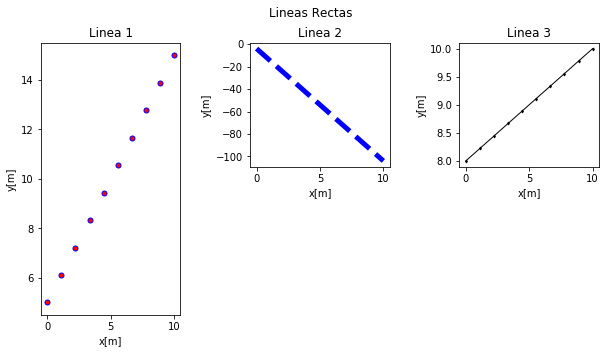

In [0]:
#Para un mismo x
x=np.linspace(0,10,10)

plt.figure(figsize=(10,5))
plt.suptitle('Lineas Rectas')  # Ponemos un título
#Podemos usar subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#Para ajustar los espacios de las figuras pequeñas
plt.subplots_adjust(wspace = 0.5)

##Vamos hacer 3 gráficas en una sóla figura
plt.subplot(1,3,1) 
plt.title('Linea 1') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Aquí vemos como cambiar el marcador, su tamaño, su color de contorno (edge) y el color de relleno (face) 
plt.plot(x,line(x,1,5),linestyle="",marker="o",markersize=5,markeredgecolor="blue",markerfacecolor="red") 

plt.subplot(2,3,2) 
plt.title('Linea 2') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Aquí vemos como cambiar el tipo de línea y su grosor 
plt.plot(x,line(x,-10,-4), color="blue",linestyle="--",linewidth=5) 

plt.subplot(2,3,3) 
plt.title('Linea 3') 
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Aquí vemos como cambiar tanto líneas como marcadores. 
plt.plot(x,line(x,0.2,8),color="black",marker="d",linewidth=1,markersize=2) 


plt.show()

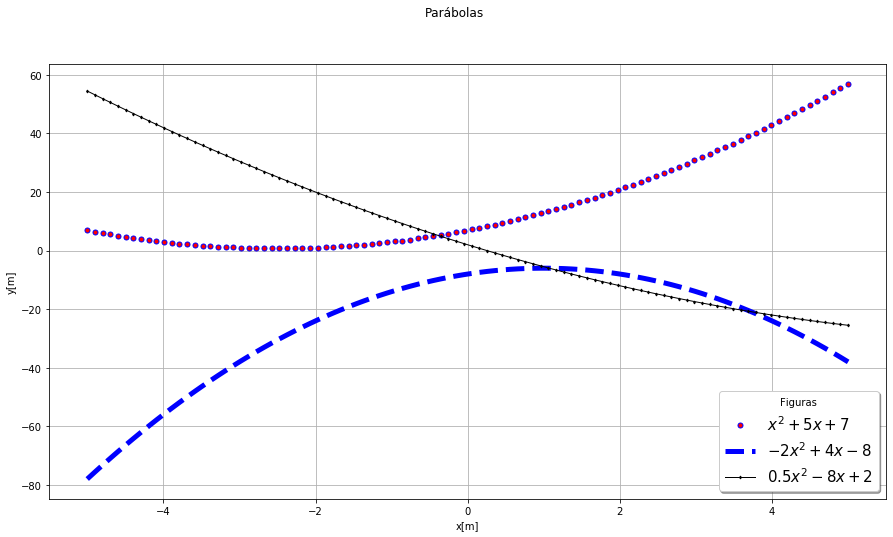

In [0]:
#Para un mismo x
x=np.linspace(-5,5,100)

plt.figure(figsize=(15,8))
plt.suptitle(u"Parábolas")  # Ponemos un título la r es para que no deje poner tildes de esta forma \'

##Vamos hacer 3 gráficas en una sóla con leyendas
plt.xlabel('x[m]')  # Ponemos etiqueta al eje x
plt.ylabel('y[m]')  # Ponemos etiqueta al eje y

#Aquí vemos como cambiar el marcador, su tamaño, su color de contorno (edge) y el color de relleno (face) 
plt.plot(x,parable(x,1,5,7),linestyle="",marker="o",markersize=5,markeredgecolor="blue",markerfacecolor="red",label=r"$x^2+5x+7$") 

#Aquí vemos como cambiar el tipo de línea y su grosor 
plt.plot(x,parable(x,-2,4,-8), color="blue",linestyle="--",linewidth=5,label=r"$-2x^2+4x-8$") 

#Aquí vemos como cambiar tanto líneas como marcadores. 
plt.plot(x,parable(x,0.5,-8,2),color="black",marker="d",linewidth=1,markersize=2,label=r"$0.5x^2-8x+2$") 

#Aquí ponemos las leyenda, podemos ubicarla con loc
plt.legend(loc="lower right", fontsize =15,ncol=1, shadow=True, title="Figuras", fancybox=True)

#Aquí ponemos una leyenda
plt.grid()

plt.show()

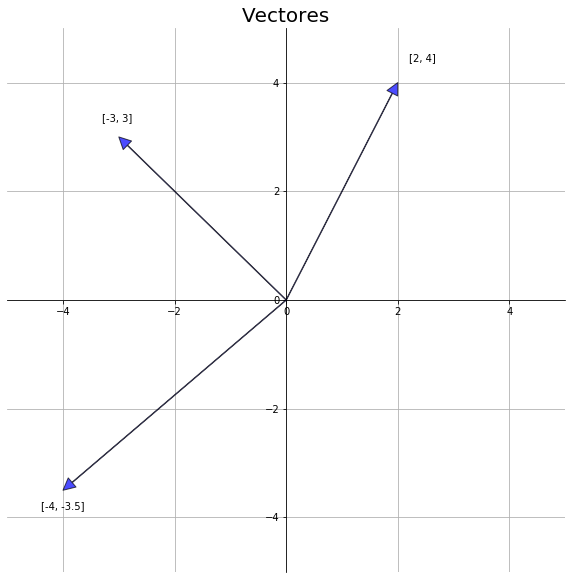

In [0]:
#Aquí usamos la clase ax que se usa para crear un objeto de ejes en la figura
fig = plt.figure(figsize=(10,10))  # creamos el objeto figura
ax = fig.add_subplot(1, 1, 1)  # Luego creamos un subplot y lo renornamos el objeto ax dentro de la figura

#Usando la clase ax podemos hacer algunas cosas más personalizadas
#El titulo ahora se anexa de esta manera
ax.set_title("Vectores",fontsize=20)

#Primero vamos a mover las líneas de la izquierda y de abajo
#para que se intersecten con el origen. 
for spine in ["left", "bottom"]:
    ax.spines[spine].set_position("zero")

#Luego se eliminan las lineas de la derecha y la de arriba y devolvemos los ejes.
for spine in ["right", "top"]:
    ax.spines[spine].set_color("none")

#Genera el grafico de los vectores en el plano
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()
vecs = [[2, 4], [-3, 3], [-4, -3.5]] # lista de vectores
for v in vecs:
    ax.annotate("", xy=v, xytext=[0, 0],
               arrowprops=dict(facecolor="blue",
                              shrink=0,
                              alpha=0.7,
                              width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], v)

plt.show()

## Animaciones

Las animaciones en jupyter-nootebook pueden ser un poco problematicas, empezando porque estamos en google colab, cómo la visualización está a cargo del browser seguro hay cosas que no permiten para no sobrecargar sus servidores. Pero no es imposible, si las animaciones son sencillas se puede hacer un vídeo pequeño usanso HTML 

In [0]:
#Lametablemente jupyter no deja ejecutar animaciones :_(

#Esta es para animaciones
import matplotlib.animation as animation

#Creamos la figura y un eje
fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
#Asociamos unos datos a la gráfica, que comienza en no gráficar nada
line, = ax.plot([], [], lw=2)
#Función de inicio
def init():
    line.set_data([], [])
    return (line,)
#Función de animación
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
print('Podemos hacer un vídeo')
#Cerramos la figura porque no nos va a mostrar la animación
plt.close(fig)

Podemos hacer un vídeo


In [0]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [0]:


v=8
#El movimiento 2d
def data_gen(t=0,v=v):
	contador = 0
	while contador < 101:
		contador += 1
		yield t, v*t-t**2*9.8  
		t += 0.02

#Aquí inicializamos el plano de la imagen de un ymin a ymax y de xmin a xmax
x1=0
x2=1
y1=0
y2=2
def init(xmin=x1,xmax=x2,ymin=y1,ymax=y2):
	ax.set_ylim(ymin,ymax)
	ax.set_xlim(xmin,xmax)
	del xdata[:]
	del ydata[:]
	line.set_data(xdata, ydata)
	return line,

#Luego creamos el entorno y la grid
fig3, ax = plt.subplots()
line, = ax.plot([], [], linestyle="--",marker="o")
ax.grid()
xdata, ydata = [], []

#Esta es la función que hace que las imagenes se actualicen
def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()
    line.set_data(xdata, ydata)
    return line,

#Y aquí ya sale la animación, podemos cambiar algunas cosas para que sea más rápido
#se repita etc...
anim = animation.FuncAnimation(fig3, run, data_gen, blit=False, interval=100,
                              repeat=False, init_func=init)
plt.close(fig3)
from IPython.display import HTML
HTML(anim.to_html5_video())

## Figuras 3D

Con los gráficos 3d pasa lo mismo que las animaciones. No se pueden rotar cómo se hace de forma interactiva. Existe una manera de trabajar con ellos en jupyter, pero en local, que los de google no tiene este módulo en su repositorio e intenté instalarlo pero no fue capaz el entorno, asumo que por las misma razones de seguridad. 

```python
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
```

Anaconda no lo trae por defecto e instalarlo es simple, va a una consola de anaconda y escriben 
`conda install -c conda-forge ipyvolume`

Más información en [source](https://ipyvolume.readthedocs.io/en/latest/install.html)

Hay varios tipos de gráficas en 3D, la primera es el dibujo sencillo, en donde se grafican puntos (x,y,z) unidos por líneas, puede ser útil para crear objetos de diseño simple. 

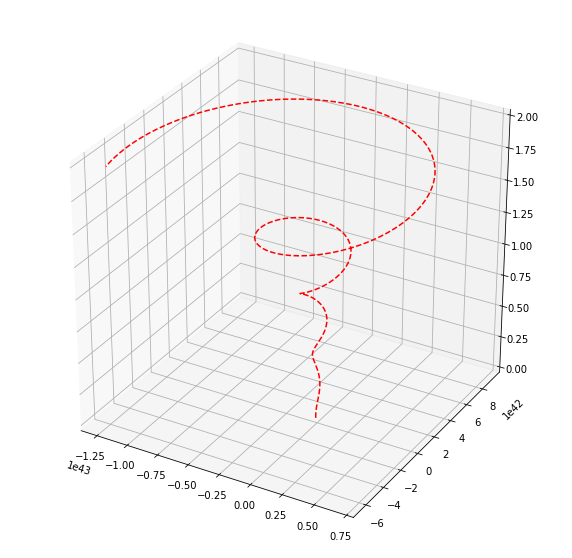

In [0]:
from mpl_toolkits.mplot3d import Axes3D
#Para añadir la proj --> 3d
#Y para finalizar un 3D sencillo
fig1 = plt.figure("Una espiral",figsize=(10,10))
ax1 = fig1.add_subplot(111, projection='3d')

a=0.5
b=0.20
th=np.linspace(475, 500, 10000)
x=a*np.exp(b*th)*np.cos(th)
y=a*np.exp(b*th)*np.sin(th)
z = np.linspace(0,2, len(th))
ax1.plot(x, y, z,linestyle='--',color='r')

plt.show()

Otro estilo del gráfico sencillo es el **scatter** o dispersado, en donde se grafican puntos que existen en el plano 3D sin conexión alguna:*texto en cursiva*

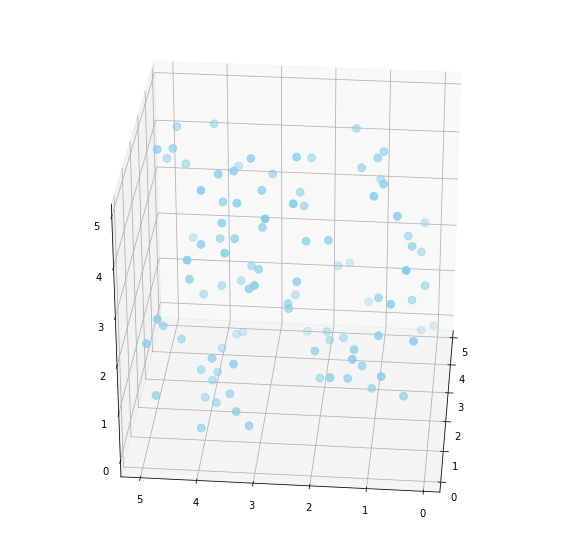

In [0]:
x=np.random.rand(100)*5
y=np.random.rand(100)*5
z=np.random.rand(100)*5

#Y para finalizar un 3D sencillo
fig = plt.figure("Conjunto sencillo de puntos",figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 185)
ax.scatter(x, y, z, c='skyblue', s=60)
plt.show()

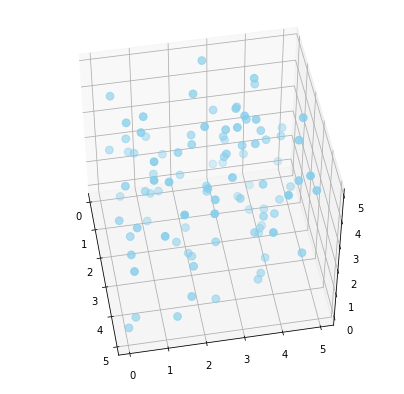

In [0]:
#Podemos cambiar la vista 
fig = plt.figure("Conjunto sencillo de puntos",figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50,azim=-10)
ax.scatter(x, y, z, c='skyblue', s=60)
plt.show()

El segundo tipo es el tipo contorno, en donde se dibujan los puntos que estén a la misma altura z de una función 3D:



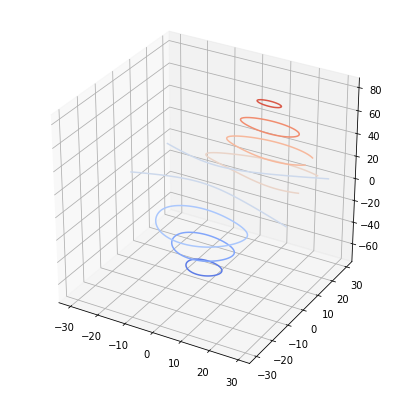

In [0]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot contour curves
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)

ax.clabel(cset, fontsize=9, inline=1)

plt.show()

Y por último estarían las gráficas de tipo superficie, en donde se conectan los puntos y se rellenan con un mapa de colores



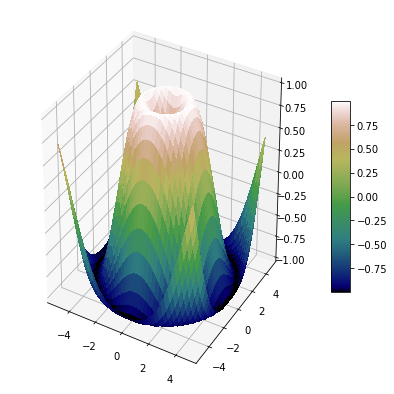

In [0]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gist_earth,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Por supuesto hay varias funciones o variaciones de los anteriores estilos que hacen gráficos más detallados, para conocer [más](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) 

## Gráficas estadísticas 




### Histogramas



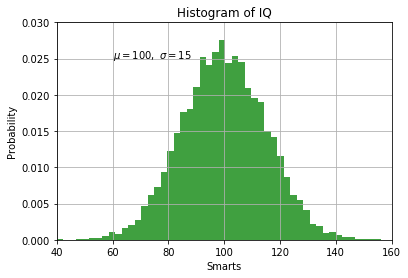

In [0]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Barras y tortas

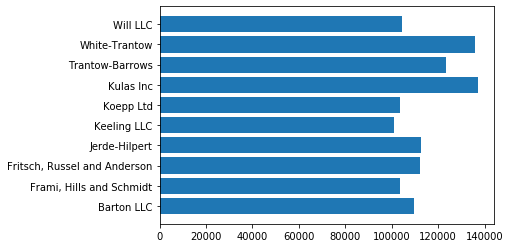

In [0]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
plt.show()

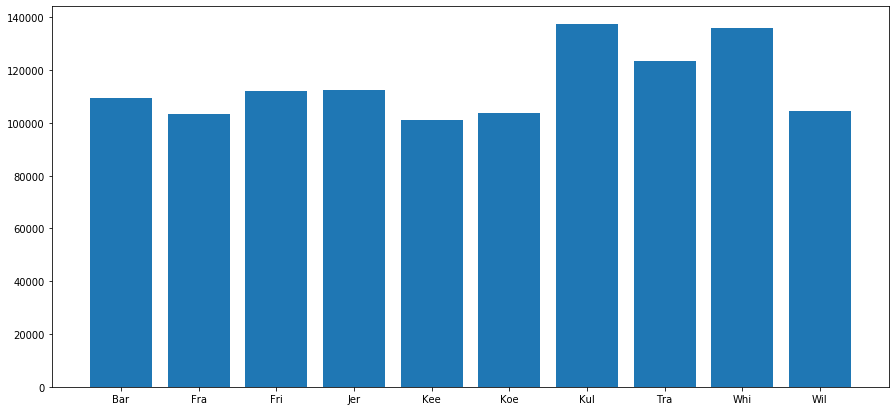

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar([name[0:3] for name in group_names], group_data)
plt.show()

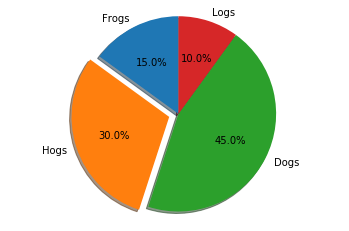

In [0]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Para más ejemplos e información [Ver más](https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)

# Pandas

Pandas es el módulo de python destinado al análisis de datos, especilamente cuando estos tiene estructuras de tabla de datos. Sus clases más importantes son el **DataFrame** (una tabla de filas x columnas) y la **Serie** (que puede ser una fila o una columna, básicamente un arreglo con un index que puede ser un número o una clave). Estas dos clases tiene una relación cercana con los diccionarios

In [0]:
import pandas as pd

randomdict = {'col1':np.random.rand(8),'col2':np.random.rand(8)}
pd.Series(randomdict)

col1    [0.6777479402999143, 0.430992426932605, 0.5671...
col2    [0.5030101414581208, 0.2719971866833696, 0.983...
dtype: object

In [0]:
pd.DataFrame(randomdict)

,col1,col2
0,0.677748,0.503010
1,0.430992,0.271997
2,0.567103,0.983501
3,0.377279,0.901459
4,0.273600,0.388388
5,0.631199,0.026407
6,0.288442,0.002444
7,0.653225,0.784784


Hay otras clases llamadas **Panel** para manejar grandes volúmenes de datos pero esas no se acostumbran a ver a menos que se trabaje con **Big Data**

## Trabajando con datos tipo csv


In [0]:
#La lectura puede ser local o online
#datos_csv = pd.read_csv('Eclipses_rd.csv')
#url = 'https://raw.githubusercontent.com/SherylA/Fundamentos/master/Notebooks/Eclipses_rd.csv'
url = 'https://drive.google.com/uc?id=1JK6s9j9kMR8azuGOLeYYSTvrrEUHfB3w'
datos_csv = pd.read_csv(url)
datos=datos_csv.copy()
datos

,Calendar Date,TD of Greatest Eclipse,Eclipse Type,Eclipse Magnitude,Central Duration
0,2014 Apr 29,06:04:32,Annular,0.987,-
1,2008 Feb 07,03:56:10,Annular,0.965,02m12s
2,2013 May 10,00:26:20,Annular,0.954,06m03s
3,2015 Mar 20,09:46:47,Total,1.045,02m47s
4,2019 Dec 26,05:18:53,Annular,0.970,03m39s
...,...,...,...,...,...
159,1984 May 30,16:45:41,Annular,0.998,00m11s
160,2019 Jul 02,19:24:07,Total,1.046,04m33s
161,2011 Jan 04,08:51:42,Partial,0.858,-
162,1977 Oct 12,20:27:27,Total,1.027,02m37s


Hay muchas cosas que se pueden hacer con respecto al análisis de datos, pero una típica es seleccionar según una condición por ejemplo, en este caso puedo seleccionar los eclipses Totales y tomar los primeros 5 valores. También podría agrupar por columnas:

In [0]:
datos[datos['Eclipse Type']=='Total'].head()

,Calendar Date,TD of Greatest Eclipse,Eclipse Type,Eclipse Magnitude,Central Duration
3,2015 Mar 20,09:46:47,Total,1.045,02m47s
7,1981 Jul 31,03:46:36,Total,1.026,02m02s
8,2006 Mar 29,10:12:22,Total,1.052,04m07s
10,2017 Aug 21,18:26:40,Total,1.031,02m40s
13,2001 Jun 21,12:03:46,Total,1.050,04m57s


In [0]:
datos.groupby(["Eclipse Type"]).count()

,Calendar Date,TD of Greatest Eclipse,Eclipse Magnitude,Central Duration
Eclipse Type,,,,
Annular,59,59,59,59
Hybrid,8,8,8,8
Partial,40,40,40,40
Total,57,57,57,57


También se puede procesar valores en tiempo 

In [0]:
#Debido a que tiempo dinámico es diferente al tiempo terrestre no voy a combinar estas dos fechas, 
#vamos a obligarles a tomar un formato el formato 
datos['Calendar Date'] = pd.to_datetime(datos['Calendar Date'])
datos['TD of Greatest Eclipse'] = pd.to_datetime(datos['TD of Greatest Eclipse'],format= '%H:%M:%S' ).dt.time
datos.groupby(datos['Calendar Date'].dt.month).count()

,Calendar Date,TD of Greatest Eclipse,Eclipse Type,Eclipse Magnitude,Central Duration
Calendar Date,,,,,
1,15,15,15,15,15
2,15,15,15,15,15
3,14,14,14,14,14
4,12,12,12,12,12
5,13,13,13,13,13
6,13,13,13,13,13
7,18,18,18,18,18
8,13,13,13,13,13
9,11,11,11,11,11


In [0]:
#Para trabajar con ellos nos veremos obligados a usar un map, pero fuera de eso
#podremos hacer operaciones. 
datos.groupby(datos['TD of Greatest Eclipse'].map(lambda x : x.hour)).count()

,Calendar Date,TD of Greatest Eclipse,Eclipse Type,Eclipse Magnitude,Central Duration
TD of Greatest Eclipse,,,,,
0,4,4,4,4,4
1,7,7,7,7,7
2,6,6,6,6,6
3,10,10,10,10,10
4,10,10,10,10,10
5,3,3,3,3,3
6,9,9,9,9,9
7,7,7,7,7,7
8,3,3,3,3,3


Podemos modificar la tabla cambiando los nombres de las columnas

In [0]:
datos.rename(columns={'Calendar Date':'Fecha calendario',
                      'TD of Greatest Eclipse':'TD de duración máxima',
                      'Eclipse Type':'Tipo de eclipse',
                      'Eclipse Magnitude':'Magnitud del eclipse',
                      'Central Duration':'Duración central'}, inplace=True)
datos.head()

,Fecha calendario,TD de duración máxima,Tipo de eclipse,Magnitud del eclipse,Duración central
0,2014-04-29,06:04:32,Annular,0.987,-
1,2008-02-07,03:56:10,Annular,0.965,02m12s
2,2013-05-10,00:26:20,Annular,0.954,06m03s
3,2015-03-20,09:46:47,Total,1.045,02m47s
4,2019-12-26,05:18:53,Annular,0.970,03m39s


Para la última columna vamoos a cambiar de strings a float

In [0]:
change = pd.DataFrame(datos['Duración central'].str.replace('-','0m0s').str.strip('s').str.split('m',1).tolist(),
                      columns=['minutos','segundos'])
datos['Duración central']=change['minutos'].astype(float)*60 + change['segundos'].astype(float)
datos.describe()

,Magnitud del eclipse,Duración central
count,164.000000,164.000000
mean,0.928732,177.195122
std,0.167019,171.560498
min,0.069000,0.000000
25%,0.919000,0.000000
50%,0.973000,147.000000
75%,1.038000,272.250000
max,1.080000,722.000000


In [0]:
datos['Fecha calendario'].dt.year.describe()

count     164.000000
mean     1996.792683
std        13.710180
min      1971.000000
25%      1985.750000
50%      1997.500000
75%      2009.000000
max      2020.000000
Name: Fecha calendario, dtype: float64

Con esto podemos hacer algunas gráficas. Pandas ya viene asociado con matplotlib para hacer gráficas rápidas, pero puede usar las series para como arreglos y  manejas sus gráficas desde matplolib pyplot.

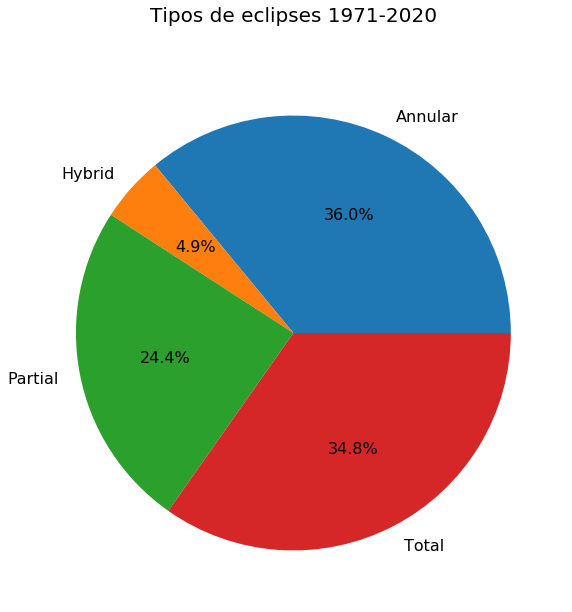

In [0]:
ax = datos.groupby('Tipo de eclipse').count()['Fecha calendario'].plot.pie(figsize=(10, 10),
                                                                           fontsize=16,
                                                                           autopct='%1.1f%%')
ax.set_ylabel('')
ax.set_title("Tipos de eclipses 1971-2020",fontsize=20,pad=40)
plt.show()

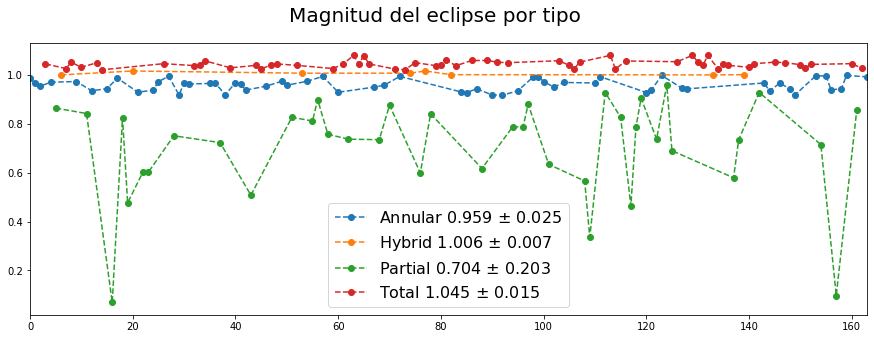

In [0]:
type_e = datos.groupby(["Tipo de eclipse"]).count().index.values
plt.figure(figsize=(15,5))
plt.suptitle('Magnitud del eclipse por tipo',fontsize=20)
for type_i in type_e:
  mu = datos[datos['Tipo de eclipse']==type_i]['Magnitud del eclipse'].mean()
  gamma = datos[datos['Tipo de eclipse']==type_i]['Magnitud del eclipse'].std()
  label = type_i + ' %.3f $\pm$ %.3f'%(mu,gamma) 
  datos[datos['Tipo de eclipse']==type_i]['Magnitud del eclipse'].plot.line(label=label,
                                                                            linestyle='--',
                                                                            marker='o')
plt.legend(fontsize=16)
plt.show()

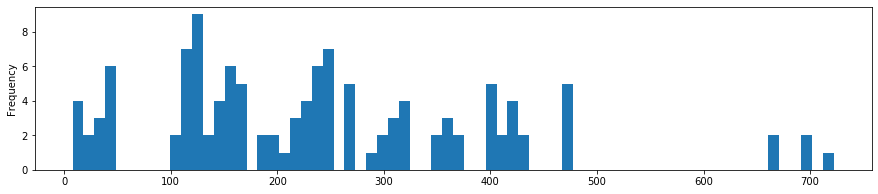

In [0]:
plt.figure(figsize=(15,3))
datos[datos['Duración central']!=0]['Duración central'].plot.hist(bins=70)
plt.show()

Y podríamos seguir haciendo todo tipo de gráficas. Pandas en un módulo grande y muy usado en la actualidad para el manejo de datos, recomiendo ver su [documentación](https://pandas.pydata.org/) 

<center>

# **EL PROFESOR Y LOS ALUMNOS DE ESTE CURSO**

![texto alternativo](https://www.generadormemes.com/download/8v26ei9fu0grdcnj7kge8hvl0xgm89b40ivbjbu4qdlheav9ypvsmx72jh615jz)

![texto del vínculo](http://generadordememesonline.com/media/created/g8vbmx.jpg)